# Current Population Survey Decision Tree Regression

Using Decision Tree Regression to predict each of the numerical variables in the dataset. In this example I am finding the optimal depth by scoring the model at increasing depths then using the optimal depth for plotting.

In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import mean_squared_error, r2_score

from sklearn import ensemble
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_csv("../datasets/CPS2016_NEW.csv", index_col=None)

# We only need numerical values for regression
data = data[['age', 'weekly_hrs', 'educ', 
                'fam_income', 'num_in_house', 'num_child']]
data = data.astype(float)

# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

# Apply 80/20 training/testing split
# Results may vary each time the data is split
data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child
0,17.0,60.0,34.0,7.0,11.0,0.0
1,64.0,20.0,35.0,16.0,2.0,0.0
2,55.0,40.0,36.0,2.0,2.0,0.0
3,58.0,18.0,36.0,9.0,2.0,0.0
4,17.0,15.0,36.0,15.0,5.0,0.0


In [3]:
# function to return necessary information about model
def scoreDecisionTreeRegressor(x, y, xTest, yTest, maxDepth):
    # add max depth and iterate 
    reg = tree.DecisionTreeRegressor(max_depth=maxDepth)
    reg.fit(x,y)

    preds = reg.predict(xTest)
    print("R2 score : %.2f" % r2_score(yTest,preds))
    print("Mean squared error: %.2f" % mean_squared_error(yTest,preds))

    er = []
    g = 0
    for i in range(len(yTest)):
        x = (yTest[i] - preds[i]) **2
        er.append(x)
        g = g + x
    
    x = 0
    for i in range(len(er)):
       x = x + er[i]

    print ("MSE", x / len(er))

    v = np.var(er)
    print ("variance", v)

    print ("average of errors ", np.mean(er))

    m = np.mean(yTest)
    print ("average of observed values", m)

    y = 0
    for i in range(len(yTest)):
        y = y + ((yTest[i] - m) ** 2)

    print ("total sum of squares", y)
    print ("ẗotal sum of residuals ", g)
    print ("r2 calculated", 1 - (g / y)) 
    
# function to plot predictions vs training data    
def plotPredictions(data_train, data_test, prediction, target):
    fig, ax = plt.subplots(1,5, figsize=(15,3), dpi=100)
    loopData = data_train.drop(target, axis=1)
    for i, var in enumerate(loopData):
        ax[i].scatter(data_train[var], data_train[target], color='pink', marker='x', label='train')
        ax[i].scatter(data_test[var], data_test[target], color='red', marker='*', label='test', alpha=.2)
        ax[i].scatter(data_test[var], prediction, color='purple', marker='.', label='predicted', alpha=.9)
        ax[i].set_xlabel(var)
        ax[i].set_ylabel(target)
    
    # Remove duplicate labels    
    handles, labels = fig.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))    
    fig.legend(by_label.values(), by_label.keys())
    plt.show()     

# function to score model at increasing tree depths    
def getDecisionTreeCVScores(X, Y):
    nb = np.arange(1,15)
    scorelist = []
    for d in nb:
        T = tree.DecisionTreeRegressor(max_depth=d)
        scores = cross_val_score(T, X, Y,
                                 cv=KFold(shuffle=True, n_splits=5), n_jobs=-1)
        scorelist.append(scores.mean())
        print(f"{d}:\t{scores.mean()}")
        
    depth = scorelist.index(max(scorelist)) + 1
    print("max score: ", max(scorelist))
    print("tree-depth =", depth)

# Predict Number of Persons Living in Household

In [4]:
# Score with cross validation at increasing tree depths to find optimal depth
target = 'num_in_house'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])

1:	0.24013847833769536
2:	0.32544431537509766
3:	0.39158296298045847
4:	0.40536838641418693
5:	0.4142841194052419
6:	0.42504748745176446
7:	0.42973433905531755
8:	0.42877198984758697
9:	0.4277419039143372
10:	0.4152893861090893
11:	0.3988772986353948
12:	0.38602079439637516
13:	0.3668773721878397
14:	0.323298842096756
max score:  0.42973433905531755
tree-depth = 7


The R2 score is greatest at tree depth = 4

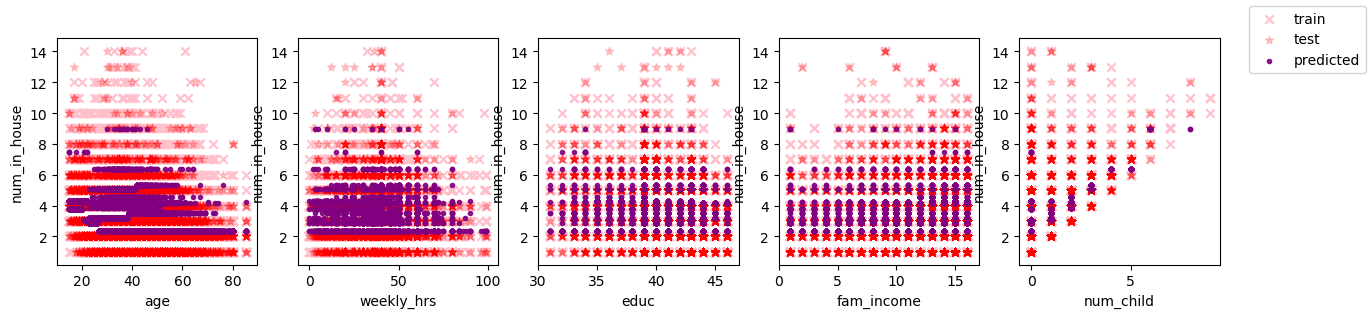

In [5]:
# Plot predictions at a tree depth of 4
T = tree.DecisionTreeRegressor(max_depth=4)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)    

In [6]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 4
scoreDecisionTreeRegressor(x, y, xTest, yTest, 4)                

R2 score : 0.40
Mean squared error: 1.43
MSE 1.426987726615753
variance 21.719146942086816
average of errors  1.426987726615807
average of observed values 3.0639761107592074
total sum of squares 26427.768889695228
ẗotal sum of residuals  15769.641366830685
r2 calculated 0.40329274738816046


Linear Regression and Decision Tree Regression have very similar R2 scores, while AdaBoost is producing lower scores around .222. The MSE and Variance are very close to Linear Regression results.

# Predict Number of own Children under 18 years of age

In [7]:
# Score with cross validation at increasing depths to find optimal depth
target = 'num_child'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target]) 

1:	0.310841403350072
2:	0.44917497520275634
3:	0.5186704873381166
4:	0.5679724662187061
5:	0.5796457430591024
6:	0.5914095215963796
7:	0.5993174207756258
8:	0.5980133773918457
9:	0.5984164524004093
10:	0.5838898973102863
11:	0.5748301718583735
12:	0.5564970864983225
13:	0.5339407760512449
14:	0.5246594576555819
max score:  0.5993174207756258
tree-depth = 7


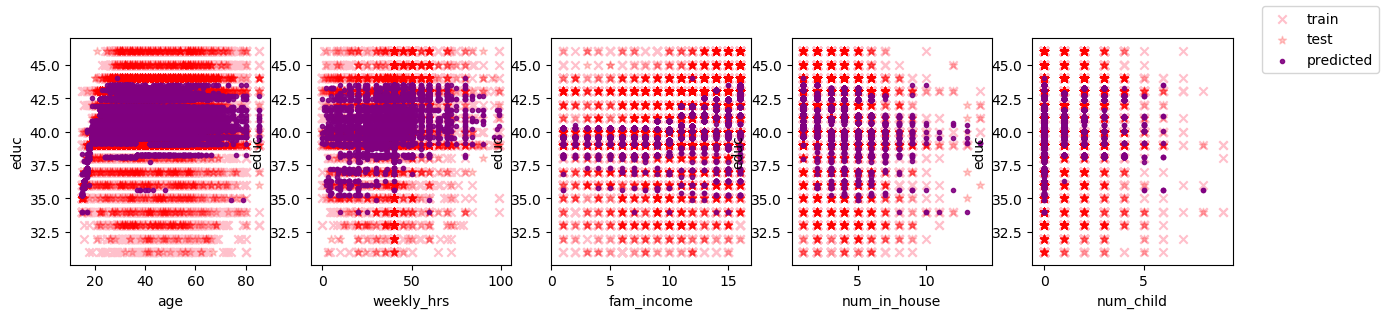

In [22]:
# Plot predictions at a tree depth of 7
T = tree.DecisionTreeRegressor(max_depth=7)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target) 

In [9]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 8
scoreDecisionTreeRegressor(x, y, xTest, yTest, 8) 

R2 score : 0.61
Mean squared error: 0.39
MSE 0.39068443612172277
variance 1.3140066475003152
average of errors  0.39068443612172055
average of observed values 0.5964166138810967
total sum of squares 11110.018097908789
ẗotal sum of residuals  4317.453703581158
r2 calculated 0.6113909387425911


Decision Tree Regression for predicting num_child produces the largest R2 score among other variables predicted using this dataset. The R2 score is larger than the other methods, and the MSE is the lowest. This may be a useful variable to predict on this dataset when using regression techiques.

# Predict Family Income (Numerical Value)
Family income is represented by integers 1 - 16, each representing increaseng income groups ranging from 'less than 5,000' to 'greater than 150,000'. Refer to dataset description for more information.

In [10]:
# Score with cross validation at increasing depths to find optimal depth
target = 'fam_income'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])   

1:	0.09902731455443267
2:	0.14380778500143138
3:	0.17018958570488382
4:	0.1879565497620196
5:	0.2031124155887146
6:	0.21600965568209918
7:	0.22654987172346405
8:	0.2316197398202461
9:	0.22930246568277549
10:	0.22073153169291088
11:	0.20425076495680844
12:	0.17923004463998587
13:	0.15412222506104153
14:	0.12740803443233056
max score:  0.2316197398202461
tree-depth = 8


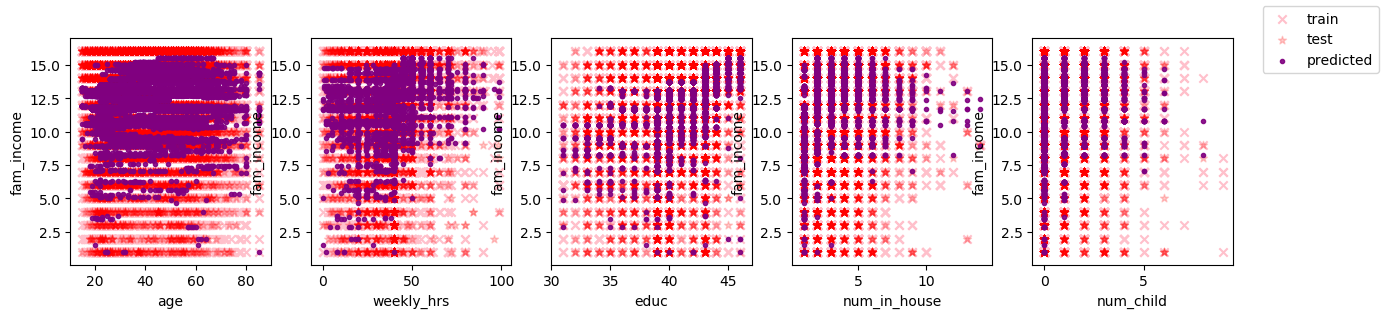

In [11]:
# Plot predictions at a tree depth of 8
T = tree.DecisionTreeRegressor(max_depth=8)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)   

In [12]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 8
scoreDecisionTreeRegressor(x, y, xTest, yTest, 8)

R2 score : 0.23
Mean squared error: 9.35
MSE 9.349524132193709
variance 343.31193991420827
average of errors  9.349524132193912
average of observed values 12.197176726088136
total sum of squares 134765.35191385
ẗotal sum of residuals  103321.59118487268
r2 calculated 0.2333222915418054


The R2 score is very low when predicting family income. The R2 score produced using Decision Tree Regression has a slightly larger R2 score than the other methods. The variance, and MSE are similar for each of the regression methods used.

# Predict Age

In [13]:
# Score with cross validation at increasing depths to find optimal depth
target = 'age'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])  

1:	0.07613588074588258
2:	0.10686908765007272
3:	0.1341591785873997
4:	0.15268218439113873
5:	0.16367602621969948
6:	0.17245870914354017
7:	0.18032319882517486
8:	0.17613971621809837
9:	0.1758828637750291
10:	0.16635706877448636
11:	0.15332813242120713
12:	0.1300676424897373
13:	0.1144234010470977
14:	0.08947560929486156
max score:  0.18032319882517486
tree-depth = 7


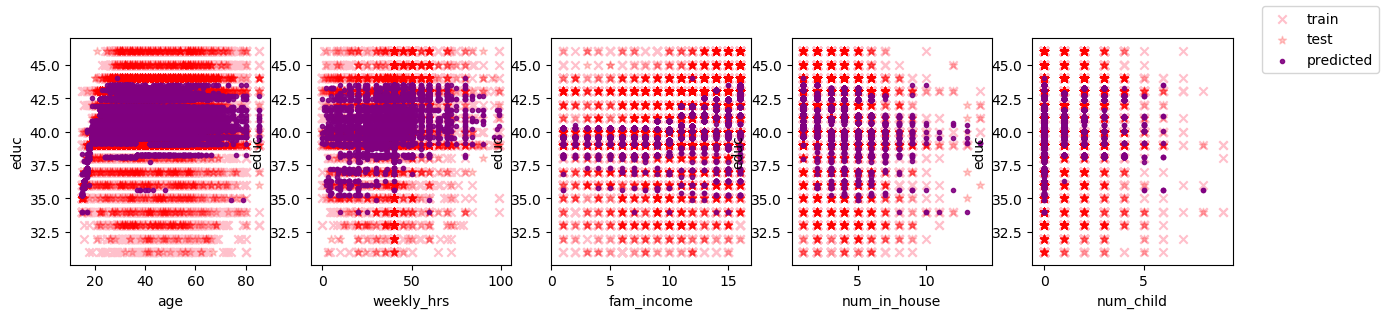

In [23]:
# Plot predictions at a tree depth of 7
T = tree.DecisionTreeRegressor(max_depth=7)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)   

In [15]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 8
scoreDecisionTreeRegressor(x, y, xTest, yTest, 8)

R2 score : 0.17
Mean squared error: 173.55
MSE 173.55095294700175
variance 56332.56839886942
average of errors  173.55095294700155
average of observed values 42.66536964980545
total sum of squares 2314764.5369649706
ẗotal sum of residuals  1917911.5810173163
r2 calculated 0.17144420074276434


The R2 score is low for each method when predicting age.

# Predict Hours Worked Weekly

In [16]:
# Score with cross validation at increasing depths to find optimal depth
target = 'weekly_hrs'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])  

1:	0.054380531184699946
2:	0.08129311808031817
3:	0.09717507155564327
4:	0.10847873310853665
5:	0.11437987220774344
6:	0.11505255284891872
7:	0.1141534866213291
8:	0.1126581142433066
9:	0.10083396311961709
10:	0.08857929652621488
11:	0.0657348183285841
12:	0.04876747616789949
13:	0.02679665664467319
14:	-0.004638829183727244
max score:  0.11505255284891872
tree-depth = 6


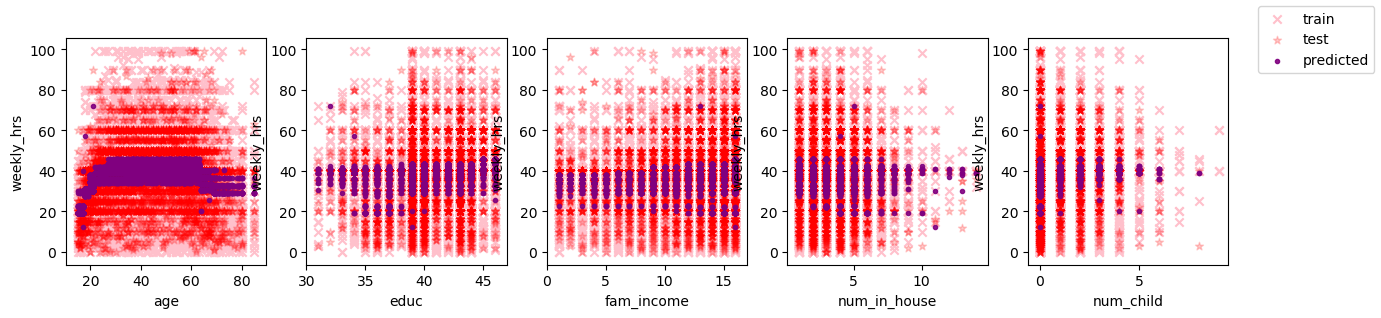

In [17]:
# Plot predictions at a tree depth of 6
T = tree.DecisionTreeRegressor(max_depth=6)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target) 

In [18]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 6
scoreDecisionTreeRegressor(x, y, xTest, yTest, 6)

R2 score : 0.12
Mean squared error: 104.06
MSE 104.06332258409687
variance 69991.35090893375
average of errors  104.0633225840937
average of observed values 39.2200705818478
total sum of squares 1313892.7883449402
ẗotal sum of residuals  1150003.7778768544
r2 calculated 0.12473545172169676


The R2 score is low for each method when predicting weekly_hrs.

# Predict Education Level
Education level is represented by integers 31-46, each representing increaseng levels of education from 'less than first grade' to 'doctorates degree'. Refer to dataset description for more information.

In [19]:
# Score with cross validation at increasing depths to find optimal depth
target = 'educ'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])  

1:	0.1097392935148869
2:	0.17046817349751853
3:	0.21061544511278826
4:	0.22891056476077037
5:	0.24202082450580603
6:	0.2488819129561012
7:	0.25661837609820476
8:	0.258713715264406
9:	0.2603043881503137
10:	0.25485585537405225
11:	0.24004173005422627
12:	0.22371575620066006
13:	0.20259636571631123
14:	0.17364033163212553
max score:  0.2603043881503137
tree-depth = 9


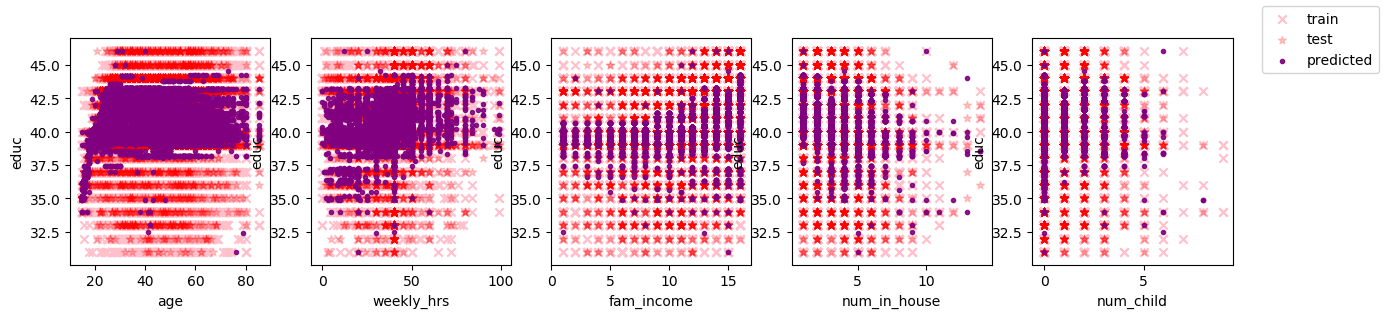

In [24]:
# Plot predictions at a tree depth of 9
T = tree.DecisionTreeRegressor(max_depth=9)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target) 

In [21]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 8
scoreDecisionTreeRegressor(x, y, xTest, yTest, 8)

R2 score : 0.26
Mean squared error: 4.94
MSE 4.944649958739662
variance 74.07611519844278
average of errors  4.944649958739784
average of observed values 40.77142340059723
total sum of squares 73796.61550990448
ẗotal sum of residuals  54643.326694032
r2 calculated 0.25954156140537177


The R2 score is somewhat low for each method when predicting education, however Decision Tree Regression produces a significantly larger score.